# Case Study 1 - Super Conductor
- Build an interpretable model to predict the Critical Temperature as closely as possible. 
- Include a write up to which variables carry the most importance. 

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [278]:
df = pd.read_csv('train.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [279]:
df1 = pd.read_csv('unique_m.csv')
df1.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [280]:
df1.drop(['material','critical_temp'], axis = 1, inplace = True)
df = pd.concat([df,df1], axis =1)

In [281]:
df.shape

(21263, 168)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 168 entries, number_of_elements to Rn
dtypes: float64(156), int64(12)
memory usage: 27.3 MB


In [283]:
df['critical_temp'].describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [284]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
Pb,21263.0,0.042461,0.274365,0.000000,0.000000,0.000000,0.000000,19.0000
Bi,21263.0,0.201009,0.655927,0.000000,0.000000,0.000000,0.000000,14.0000
Po,21263.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
At,21263.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


In [285]:
df.isna().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Pb                       0
Bi                       0
Po                       0
At                       0
Rn                       0
Length: 168, dtype: int64

# Inspecting Target Variable

In [286]:
from scipy.stats import boxcox

# Apply the Box-Cox transformation directly to the original "critical_temp" values
transformed_data, lambda_value = boxcox(df['critical_temp'])

# Add the transformed data to the DataFrame
df['critical_temp_transform'] = transformed_data

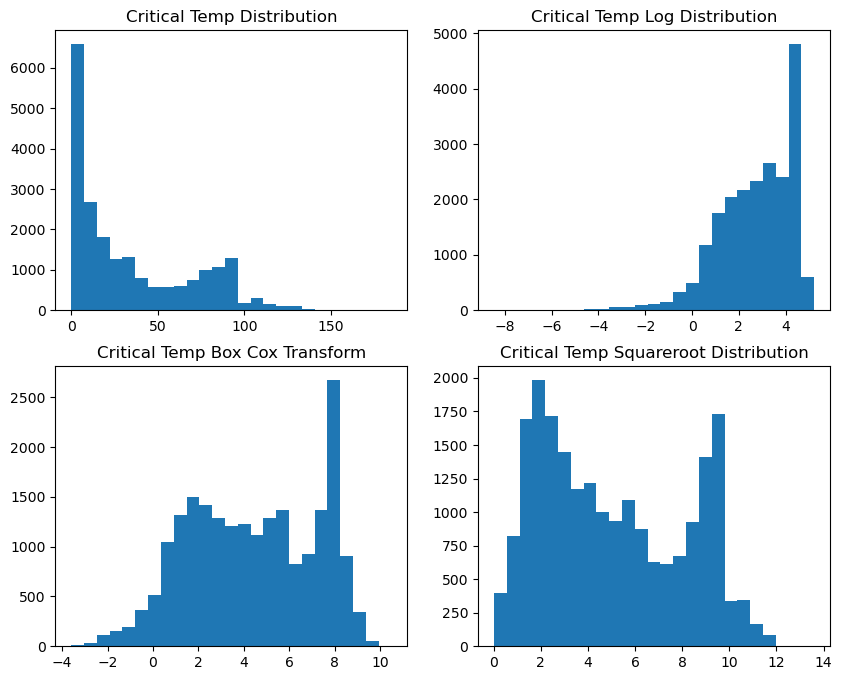

In [287]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

axes[0,0].hist(df['critical_temp'], bins = 25)
axes[0,0].set_title('Critical Temp Distribution')

axes[0,1].hist(np.log(df['critical_temp']), bins = 25)
axes[0,1].set_title('Critical Temp Log Distribution')

axes[1,1].hist(np.sqrt(df['critical_temp']), bins = 25)
axes[1,1].set_title('Critical Temp Squareroot Distribution')

axes[1,0].hist(df['critical_temp_transform'], bins = 25)
axes[1,0].set_title('Critical Temp Box Cox Transform')

plt.show()

# Correlation Info / Plots

### Scaling Data & Train Test Split

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['critical_temp_transform', 'critical_temp'], axis = 1)
y = df[['critical_temp']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=12)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [291]:
core_data = pd.concat([X_train_scaled, y_train], axis = 1)
correlation_data = core_data.corr()
correlation_target = correlation_data['critical_temp']

In [292]:
correlation_target.nsmallest(10)

Cs                      -0.076822
Tc                      -0.075295
std_atomic_radius       -0.071642
S                       -0.071229
Er                      -0.070134
Os                      -0.063045
F                       -0.060455
wtd_range_FusionHeat    -0.059163
wtd_std_atomic_radius   -0.058988
range_atomic_radius     -0.058825
Name: critical_temp, dtype: float64

In [293]:
correlation_target.nlargest(15)

critical_temp              1.000000
Pd                         0.090037
Sb                         0.072646
Ga                         0.058372
Be                         0.057971
Mg                         0.055814
Gd                         0.051689
Cd                         0.048384
Ce                         0.043995
Se                         0.043839
wtd_entropy_FusionHeat     0.040298
Sr                         0.038631
Al                         0.034591
Mo                         0.034585
wtd_range_atomic_radius    0.034153
Name: critical_temp, dtype: float64

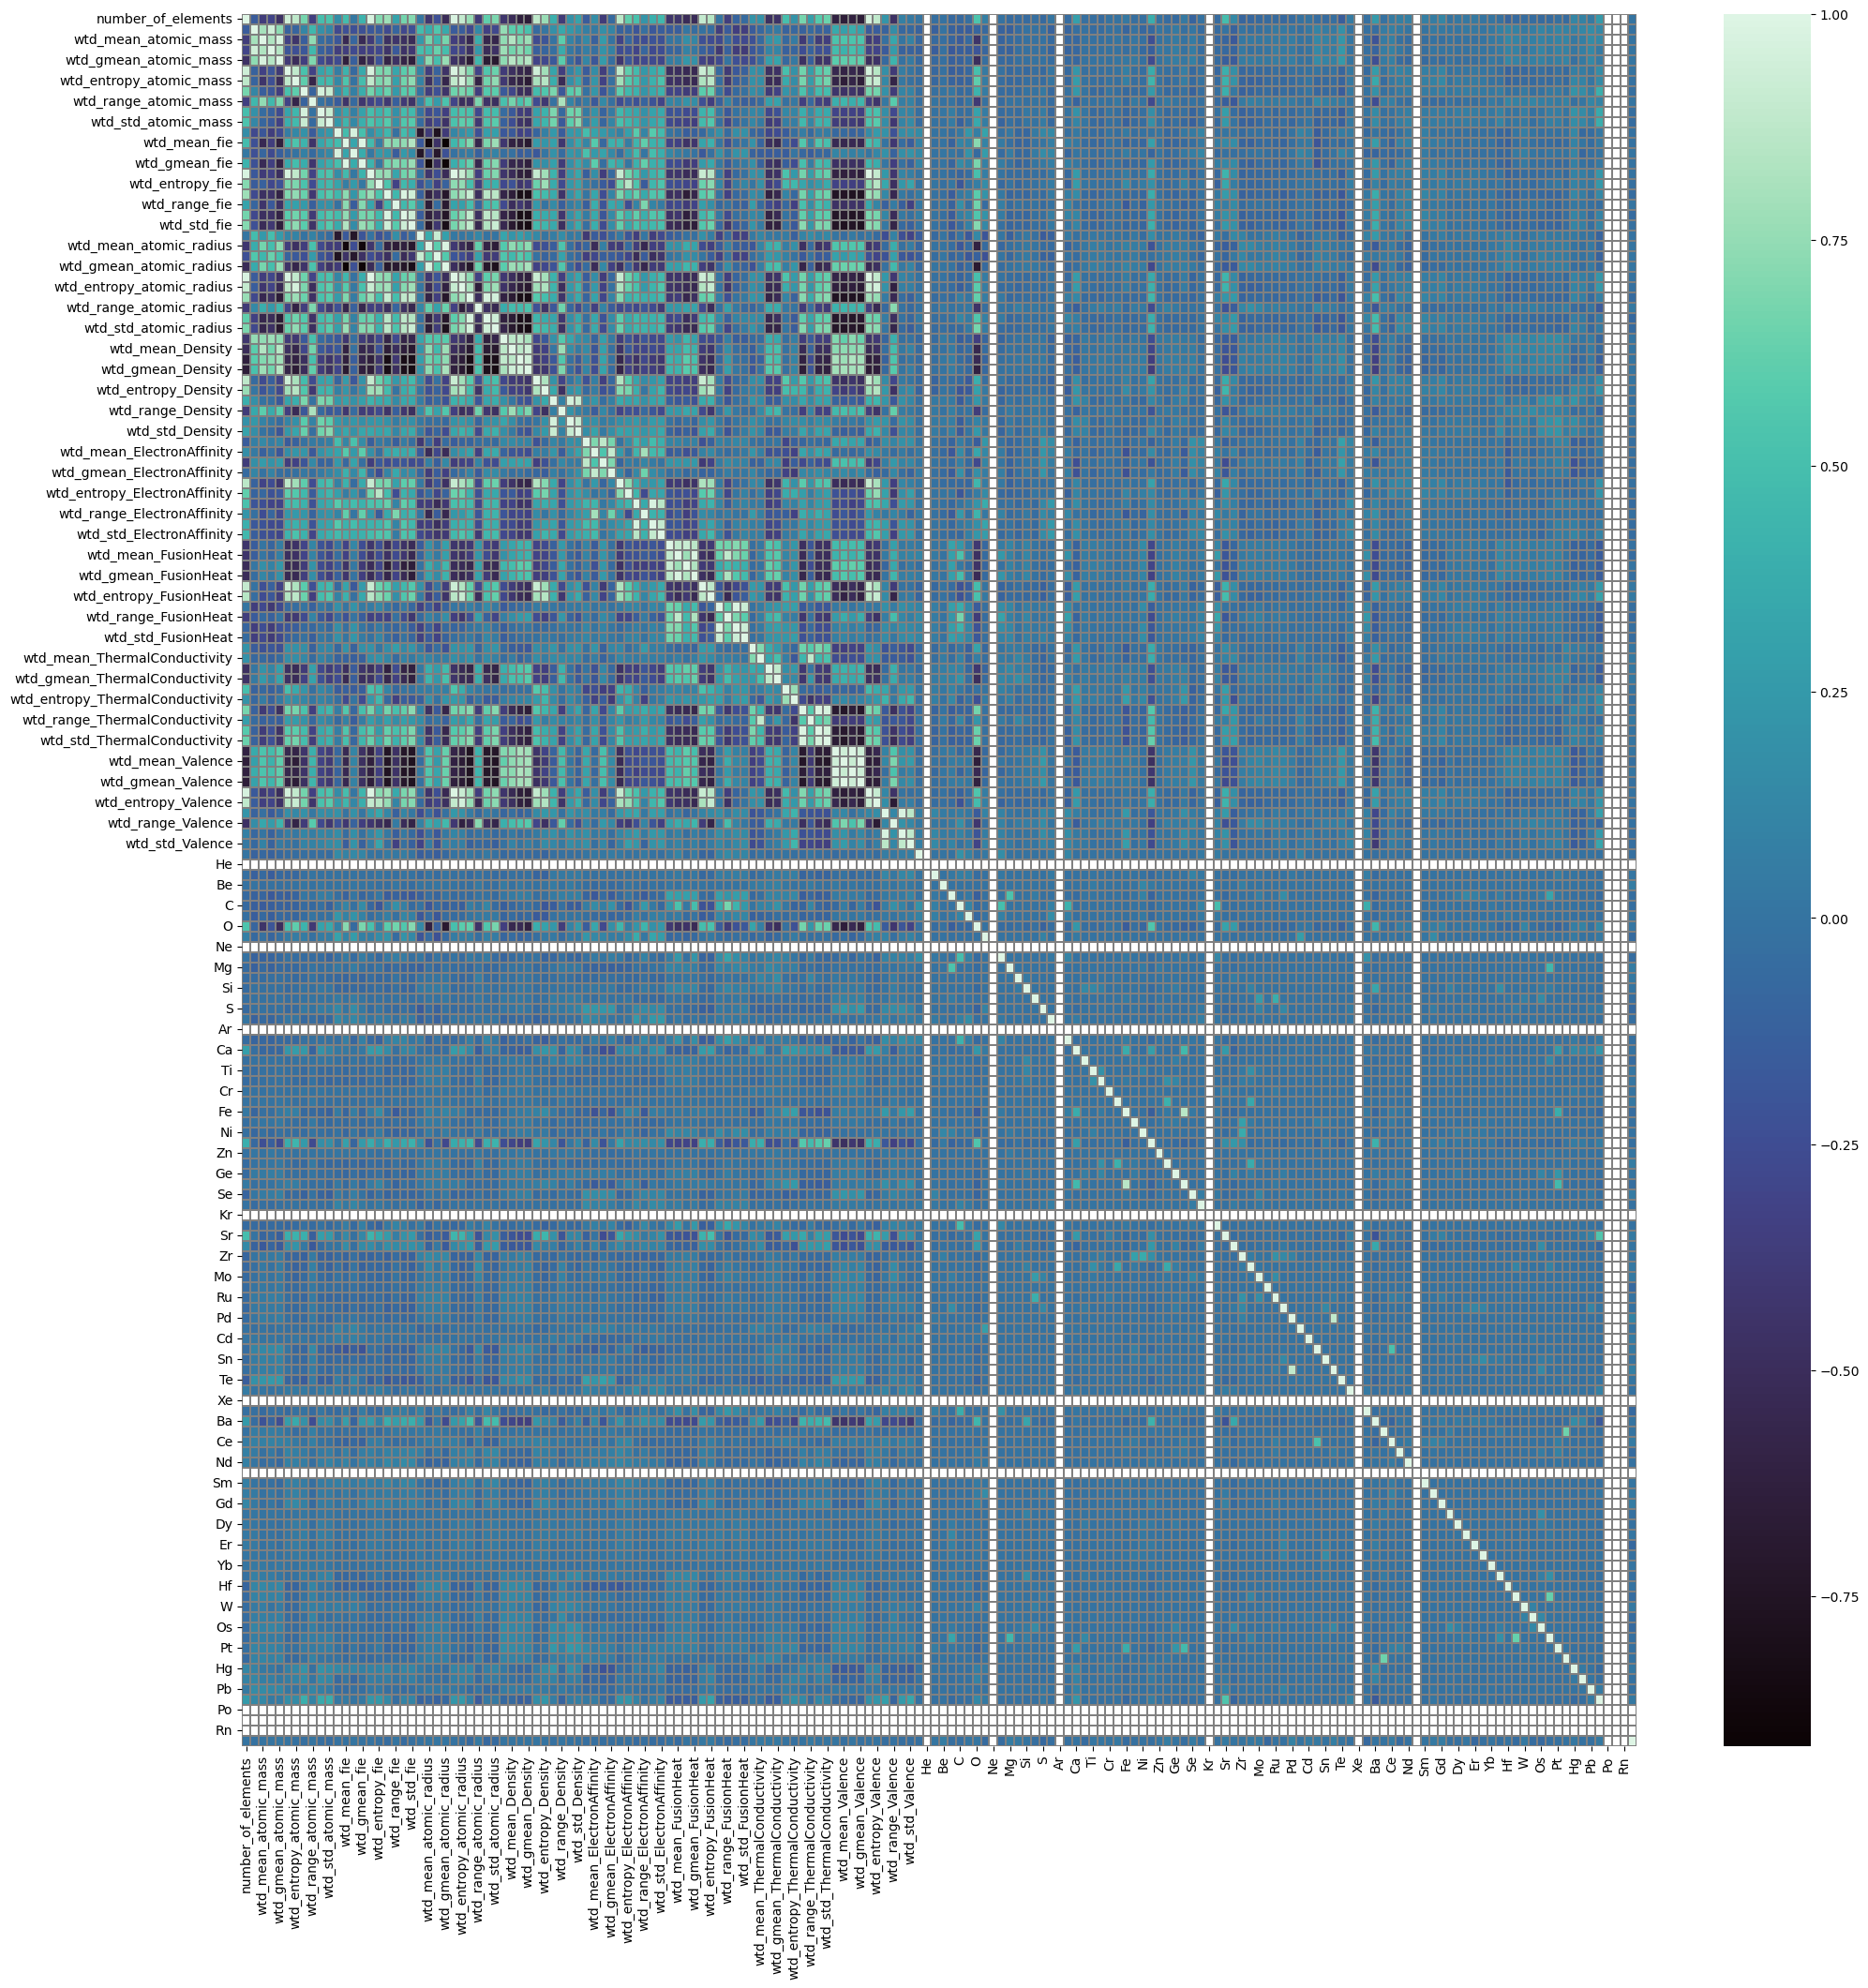

In [294]:
plt.figure(figsize=(24,24))
sns.heatmap(correlation_data,linecolor='grey', cmap = 'mako', linewidths=.01)
plt.show()

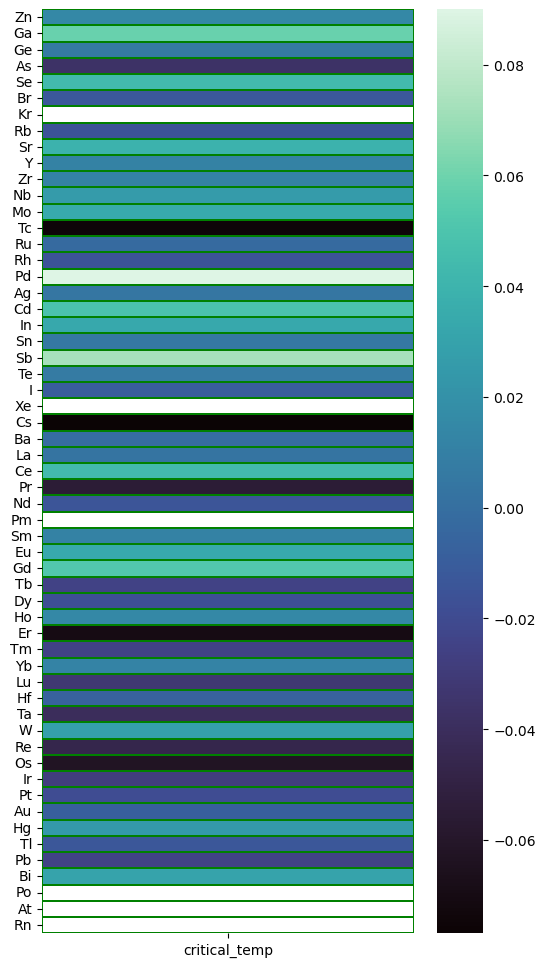

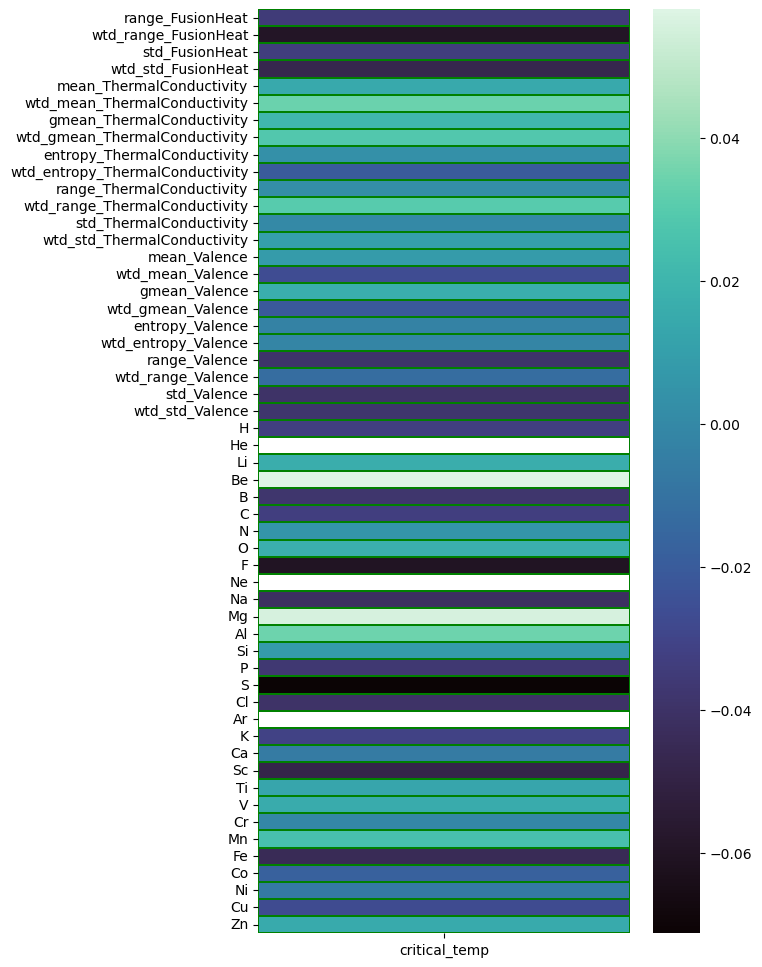

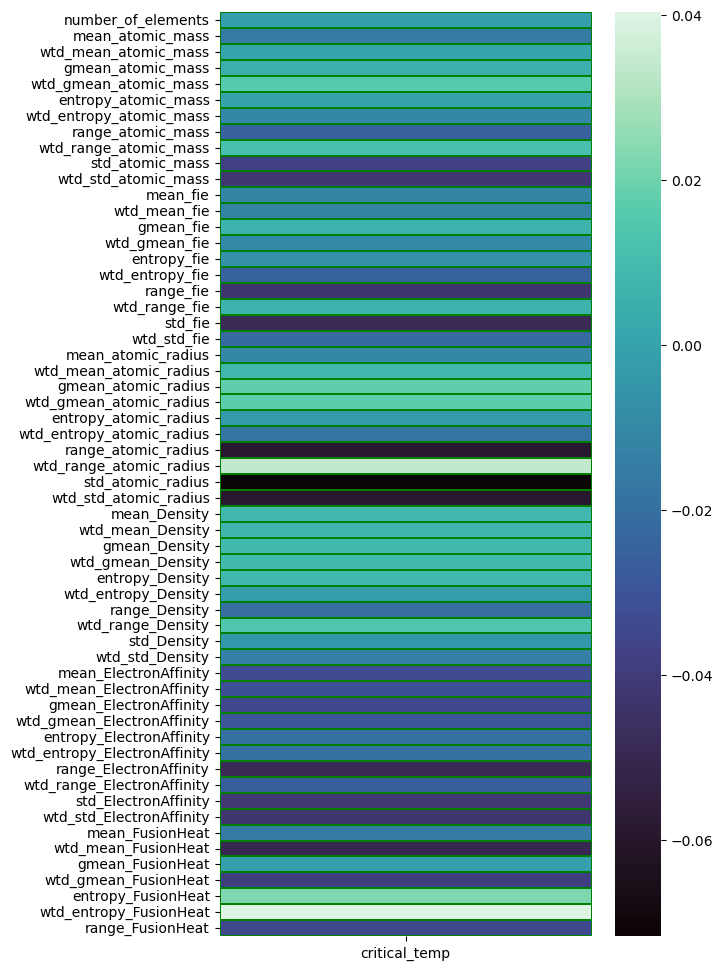

In [295]:
plt.figure(figsize=(6,12))
sns.heatmap(correlation_data.iloc[110:167,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

plt.figure(figsize=(6,12))
sns.heatmap(correlation_data.iloc[57:111,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

plt.figure(figsize=(6,12))
sns.heatmap(correlation_data.iloc[0:58,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

<hr>

# Lasso

<hr>

## Lasso CV

In [296]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV, Lasso
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category = ConvergenceWarning)

# initializing LassoCV
lasso_model = LassoCV(alphas = np.logspace(-2,2,11), cv=5)
lasso_model.fit(X_train_scaled, y_train)

# best alpha 
best_alpha = lasso_model.alpha_
print('Best alpha: ', best_alpha)

# Initializing Lasso with best alpha
lasso_best_alpha = Lasso(alpha = best_alpha)

# perfoming cross_val_ with scoring metric
scores = cross_val_score(lasso_best_alpha, X_train_scaled, y_train, cv=5, scoring = 'neg_mean_squared_error')
rmse_scores = (-scores)**.5

print('Cross-Validation RMSE Scores: ', rmse_scores)
print('Average RMSE: ', rmse_scores.mean())

# cross val predictions
cv_predictions = cross_val_predict(lasso_best_alpha, X_train_scaled, y_train, cv = 5)
cv_rmse = mean_squared_error(y_train, cv_predictions, squared = False)
print('Cross-Validation RMSE using cross_val_predict', cv_rmse)

c:\Users\Joey\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha:  0.01
Cross-Validation RMSE Scores:  [17.05565836 18.14421384 18.75547573 16.2031406  17.80876668]
Average RMSE:  17.593451043493214
Cross-Validation RMSE using cross_val_predict 17.615726908951018


## Hold out Set predictions

In [297]:
# fit best alpha model
lasso_best_alpha.fit(X_train_scaled, y_train)

y_pred_test = lasso_best_alpha.predict(X_test_scaled)
holdout_rmse = mean_squared_error(y_test, y_pred_test, squared = False)
print('Hold-out RMSE: ', holdout_rmse)

Hold-out RMSE:  23.508161878655983


<hr>

# Ridge

<hr>

In [298]:
from sklearn.linear_model import RidgeCV, Ridge

ridge_model = RidgeCV(alphas = np.logspace(-2,2,11), cv = 5)
ridge_model.fit(X_train_scaled, y_train)

best_alpha = ridge_model.alpha_
print('Best alpha: ', best_alpha)

ridge_best_alpha = Ridge(alpha = best_alpha)

scores = cross_val_score(ridge_best_alpha, X_train_scaled, y_train, cv =5, scoring = 'neg_mean_squared_error')
rmse_scores = (-scores)**.5

print('Cross-Validation RMSE Scores: ', rmse_scores)
print('Average RMSE: ', rmse_scores.mean())

cv_predictions = cross_val_predict(ridge_best_alpha, X_train_scaled, y_train, cv=5)
cv_rmse = mean_squared_error(y_train, cv_predictions, squared = False)
print('Cross - Validation RMSE using Cross Val Pred', cv_rmse)


Best alpha:  0.01
Cross-Validation RMSE Scores:  [16.93111055 17.75577535 18.70122445 16.1260031  17.88780085]
Average RMSE:  17.48038286157027
Cross - Validation RMSE using Cross Val Pred 17.5024262268729


## Holdout Set Predictions

In [299]:
ridge_best_alpha.fit(X_train_scaled, y_train)
y_pred_test = ridge_best_alpha.predict(X_test_scaled)
holdout_rmse = mean_squared_error(y_test, y_pred_test, squared = False)
print('Holdout RMSE: ', holdout_rmse)


Holdout RMSE:  24.772338045618124


# Scale & Split Data with "Critical Temp Transformed

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['critical_temp_transform', 'critical_temp'], axis = 1)
y = df['critical_temp_transform']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=12)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

<hr>

## Linear Regression With Elastic Net Feature Selection

<hr>

In [301]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import ElasticNet, ElasticNetCV
import numpy as np

# Create the ElasticNetCV model for hyperparameter tuning
elastic_net_cv = ElasticNetCV(alphas=np.logspace(-3, 3, 50), l1_ratio=np.linspace(0.01, 1, 50), cv=5, random_state=12)

# Fit the ElasticNetCV model
elastic_net_cv.fit(X_train_scaled, y_train)

# Get the best alpha and l1_ratio from ElasticNetCV
best_alpha = elastic_net_cv.alpha_
best_ratio = elastic_net_cv.l1_ratio_

# Create the ElasticNet model with the best hyperparameters
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_ratio)

# Calculate cross-validated scores
cv_scores = cross_val_score(elastic_net, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate cross-validated predictions
cv_predictions = cross_val_predict(elastic_net, X_train_scaled, y_train, cv=5)

# Convert negative MSE scores to positive RMSE scores
rmse_scores = np.sqrt(-cv_scores)

# Print the RMSE scores for each fold
for fold_idx, rmse in enumerate(rmse_scores):
    print(f"Fold {fold_idx + 1} RMSE: {rmse:.4f}")

Fold 1 RMSE: 1.3381
Fold 2 RMSE: 1.4104
Fold 3 RMSE: 1.3590
Fold 4 RMSE: 1.3471
Fold 5 RMSE: 1.3903


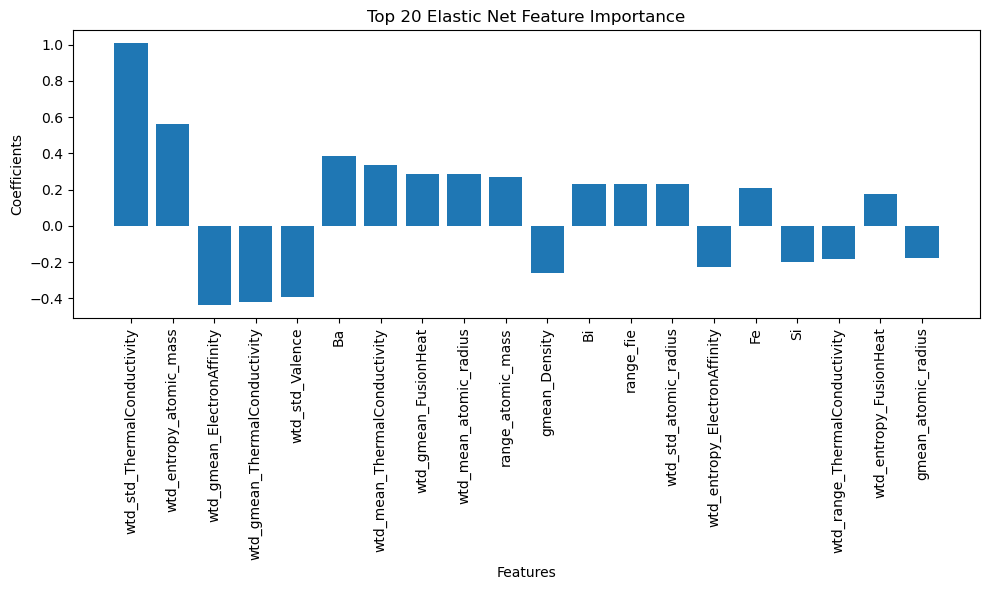

In [302]:
elastic_net.fit(X_train_scaled, y_train)

# Get the coefficients from the trained Elastic Net model
elastic_net_coefficients = elastic_net.coef_

# Get the corresponding feature names
feature_names = X_train.columns

# Sort the coefficients and feature names together based on absolute coefficient values
sorted_indices = abs(elastic_net_coefficients).argsort()[::-1]
top_indices = sorted_indices[:20]  # Select the top 20 feature indices
top_coefficients = elastic_net_coefficients[top_indices]
top_feature_names = feature_names[top_indices]

# Create a feature importance plot for the top 20 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_names)), top_coefficients)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Top 20 Elastic Net Feature Importance')
plt.tight_layout()
plt.show()

In [303]:
selected_features = ["number_of_elements", "mean_atomic_mass", "wtd_mean_atomic_mass",
                    "gmean_atomic_mass", "wtd_entropy_atomic_mass", "range_atomic_mass",
                    "wtd_range_atomic_mass", "wtd_std_atomic_mass", "wtd_mean_fie",
                    "gmean_fie", "entropy_fie", "range_fie", "mean_atomic_radius",
                    "wtd_mean_atomic_radius", "gmean_atomic_radius", "wtd_entropy_atomic_radius",
                    "range_atomic_radius", "wtd_std_atomic_radius", "mean_Density",
                    "wtd_mean_Density", "gmean_Density", "wtd_entropy_Density",
                    "wtd_range_Density", "wtd_std_Density", "wtd_mean_ElectronAffinity",
                    "gmean_ElectronAffinity", "wtd_gmean_ElectronAffinity", "wtd_entropy_ElectronAffinity",
                    "wtd_range_ElectronAffinity", "std_ElectronAffinity", "wtd_std_ElectronAffinity",
                    "mean_FusionHeat", "wtd_mean_FusionHeat", "gmean_FusionHeat",
                    "wtd_gmean_FusionHeat", "entropy_FusionHeat", "wtd_entropy_FusionHeat",
                    "range_FusionHeat", "wtd_range_FusionHeat", "std_FusionHeat",
                    "wtd_std_FusionHeat", "mean_ThermalConductivity", "wtd_mean_ThermalConductivity",
                    "gmean_ThermalConductivity", "wtd_gmean_ThermalConductivity", "entropy_ThermalConductivity",
                    "wtd_entropy_ThermalConductivity", "range_ThermalConductivity", "wtd_range_ThermalConductivity",
                    "std_ThermalConductivity", "wtd_std_ThermalConductivity", "gmean_Valence",
                    "wtd_gmean_Valence", "entropy_Valence", "wtd_entropy_Valence",
                    "range_Valence", "wtd_range_Valence", "std_Valence",
                    "wtd_std_Valence", "H", "Li", "Be", "B", "C", "N", "O", "F",
                    "Na", "Mg","Si", "P", "S", "Cl", "K", "Ca", "Sc", "Ti",
                    "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As",
                    "Se", "Br", "Rb", "Sr", "Zr", "Nb", "Mo", "Tc", "Rh", "Pd", "Ag",
                    "Cd", "In", "Sn", "Sb", "I", "Cs", "Ba", "La", "Ce", "Pr", "Nd",
                    "Sm", "Eu", "Gd", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W",
                    "Os", "Pt", "Au", "Hg", "Tl", "Pb", "Bi"
                    ]

## Linear Regression Model - Elastic Net

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.special import inv_boxcox

X_train_selected = X_train_scaled[selected_features].reset_index(drop=True)
y_train_selected = y_train.reset_index(drop=True)

X_test_selected = X_test_scaled[selected_features].reset_index(drop=True)
y_test_selected = y_test.reset_index(drop=True)

# Add a constant term to the features
X_train_selected_with_const = sm.add_constant(X_train_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

# Fit the OLS model
linear_model = sm.OLS(y_train_selected, X_train_selected_with_const).fit()

# Print the model summary
print(linear_model.summary())


                               OLS Regression Results                              
Dep. Variable:     critical_temp_transform   R-squared:                       0.798
Model:                                 OLS   Adj. R-squared:                  0.792
Method:                      Least Squares   F-statistic:                     127.6
Date:                     Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                             20:02:22   Log-Likelihood:                -7021.0
No. Observations:                     4252   AIC:                         1.430e+04
Df Residuals:                         4123   BIC:                         1.512e+04
Df Model:                              128                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Predictions - Elastic Net

In [305]:
# Make predictions positive (won't work with negative predictions)
# there isn't alot so we proceeded and used very very small number
y_train_pred_transformed[y_train_pred_transformed <= 0] = 1e-9
y_test_pred_transformed[y_test_pred_transformed <= 0] = 1e-9

# Inverse transform the predictions
y_train_pred_original = inv_boxcox(y_train_pred_transformed, lambda_value)
y_test_pred_original = inv_boxcox(y_test_pred_transformed, lambda_value)

# Inverse transform y 
y_train_original = inv_boxcox(y_train_selected, lambda_value)
y_test_original = inv_boxcox(y_test_selected, lambda_value)

# Compute RMSE
train_rmse_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
test_rmse_original = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))

print(f'Training RMSE (original scale): {train_rmse_original:.4f}')
print(f'Test RMSE (original scale): {test_rmse_original:.4f}')



Training RMSE (original scale): 16.8308
Test RMSE (original scale): 17.6238


## Model Assumptions Plot - Elastic Net

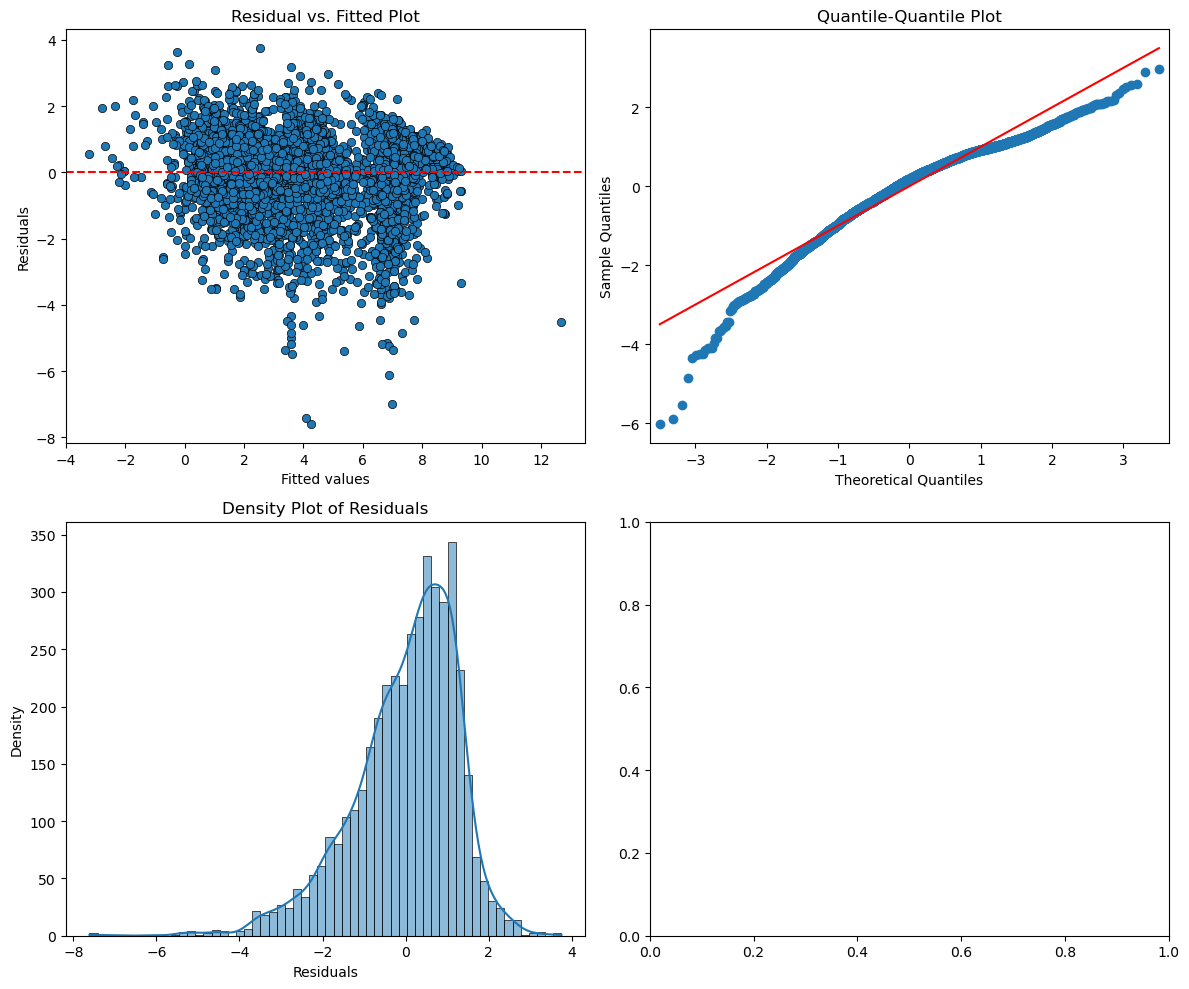

In [306]:
# Calculate residuals
residuals = linear_model.resid

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Residual vs. Fitted Plot
sns.scatterplot(x=linear_model.fittedvalues, y=residuals, edgecolor='k', ax=axes[0, 0])
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual vs. Fitted Plot')

# Q-Q Plot
sm.qqplot(residuals, line='s', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantile-Quantile Plot')

# Density Plot of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Density Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

# Model Scores

In [307]:
# print('Lasso Based Linear Regression Model')
# print('RMSE: ', rmse_original_lasso,'\n')
# print('Ridge Based Linear Regression Model')
# print('RMSE: ', rmse_original_ridge,'\n')
# print('Elastic Net Linear Regression Model')
# print('RMSE: ', rmse_original_elastic)